<a href="https://colab.research.google.com/github/kalebsampaco/Ejercicios-en-google-colab/blob/master/regresi%C3%B3n_base_de_datos_boston_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13
Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 723us/step - loss: 0.8013 - mse: 0.8013 - val_loss: 0.3808 - val_mse: 0.3808
Epoch 2/50
404/404 [==============================] - 0s 35us/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 3/50
404/404 [==============================] - 0s 32us/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0953 - val_mse: 0.0953
Epoch 4/50
404/404 [==============================] - 0s 32us/step - loss: 0.1040 - mse: 0.1040 - val_loss: 0.0936 - val_mse: 0.0936
Epoch 5/50
404/404 [==============================] - 0s 32us/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 6/50
404/404 [==============================] - 0s 31us/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 7/50
404/404 [==============================] - 0s 38us/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0477 - val_mse: 0.0477
Epoch 8/50
404/404 

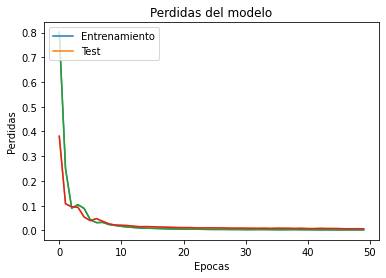

In [5]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.applications import VGG16
import matplotlib.pylab as plt


batch_size=100
epochs=50

from keras.datasets import boston_housing

(xt,yt),(xtest,ytest)= boston_housing.load_data()

mean=xt.mean(axis=0)
xt -= mean
std=xt.std(axis=0)
xt /=std
print(xt.shape[1])
xtest -=mean
xtest /=std


maximo=np.max(yt)
yt=yt/(maximo)
ytest=ytest/(maximo)

Entradas=Input(shape=(13,))
x=Dense(64,activation='relu')(Entradas)
x=Dense(64,activation='relu')(x) 
x=Dense(1,activation='linear')(x)

modelo = Model(inputs=Entradas, outputs=x)
#modelo.summary()
Adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

modelo.compile(loss=keras.losses.mse,optimizer=Adam,metrics=['mse'])

history=modelo.fit(xt,yt,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xtest,ytest))

puntuacion=modelo.evaluate(xtest,ytest,verbose=1)

print(puntuacion)

plt.figure(2)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Precisión del modelo')
plt.ylabel('Presición')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')


plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()